# Statistical analysis of data described abalone snails

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from itertools import combinations

sns.set_theme(color_codes=True)

In [2]:
# read data
data = pd.read_csv('data.csv')

# brief overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
# file doesn't contain column headers so we need to add them manually
data.columns = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
    'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'
]
# rename values in the sex column to be more readable
data['Sex'].replace(['M', 'F', 'I'], ['Male', 'Female', 'Infant'], inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,Male,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,Infant,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
# sex column is the only qualitative feature
qualitative = data.loc[:, 'Sex'].copy()
# quantitative features
quantitative = data.loc[:, data.columns!='Sex'].copy()

### 1. Trait distribution of the qualitative (sex) feature 

In [5]:
# number of occurrences of each sex
grouped_counts = qualitative.value_counts()
# percentage occurrence
grouped_percentage = qualitative.value_counts(normalize=True).mul(100).round(1)
# create dataframe
trait_dist = pd.DataFrame({'count': grouped_counts, '%': grouped_percentage})

trait_dist 

,count,%
Male,1527,36.6
Infant,1342,32.1
Female,1307,31.3


### 2. Measure of the distribution of quantitative features

In [6]:
quantitative.describe().drop(['count'], axis=0).T

,mean,std,min,25%,50%,75%,max
Length,0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter,0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height,0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole weight,0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked weight,0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera weight,0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell weight,0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000


### 3. Bar chart of the sex (qualitative) feature

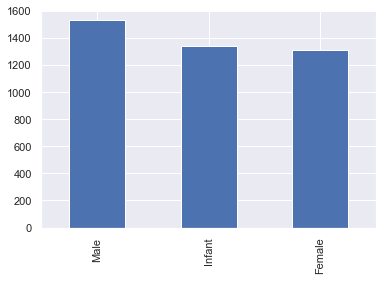

In [7]:
grouped_counts.plot.bar(x=grouped_counts.index, y=grouped_counts.values)

plt.show()

### 4. Histograms of the quantitative features

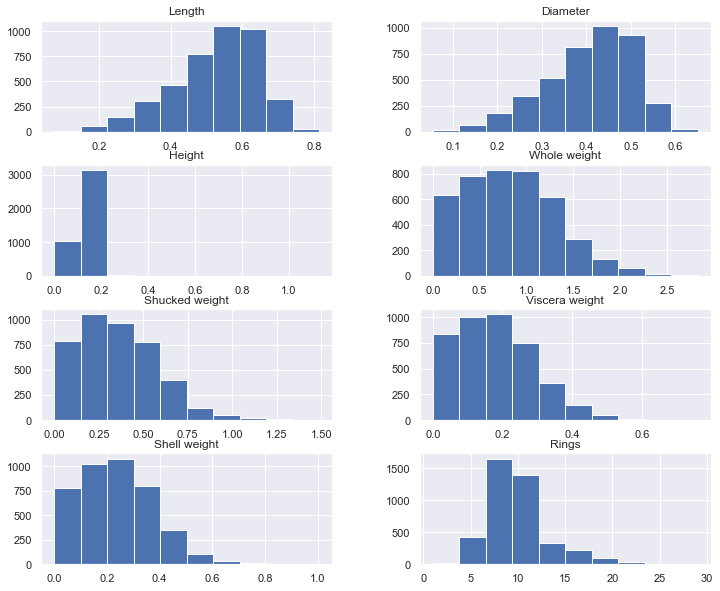

In [8]:
quantitative.hist(layout=(4,2), figsize=(12,10))

plt.show()

### 5. Scatter charts for each pair of the quantitative features 

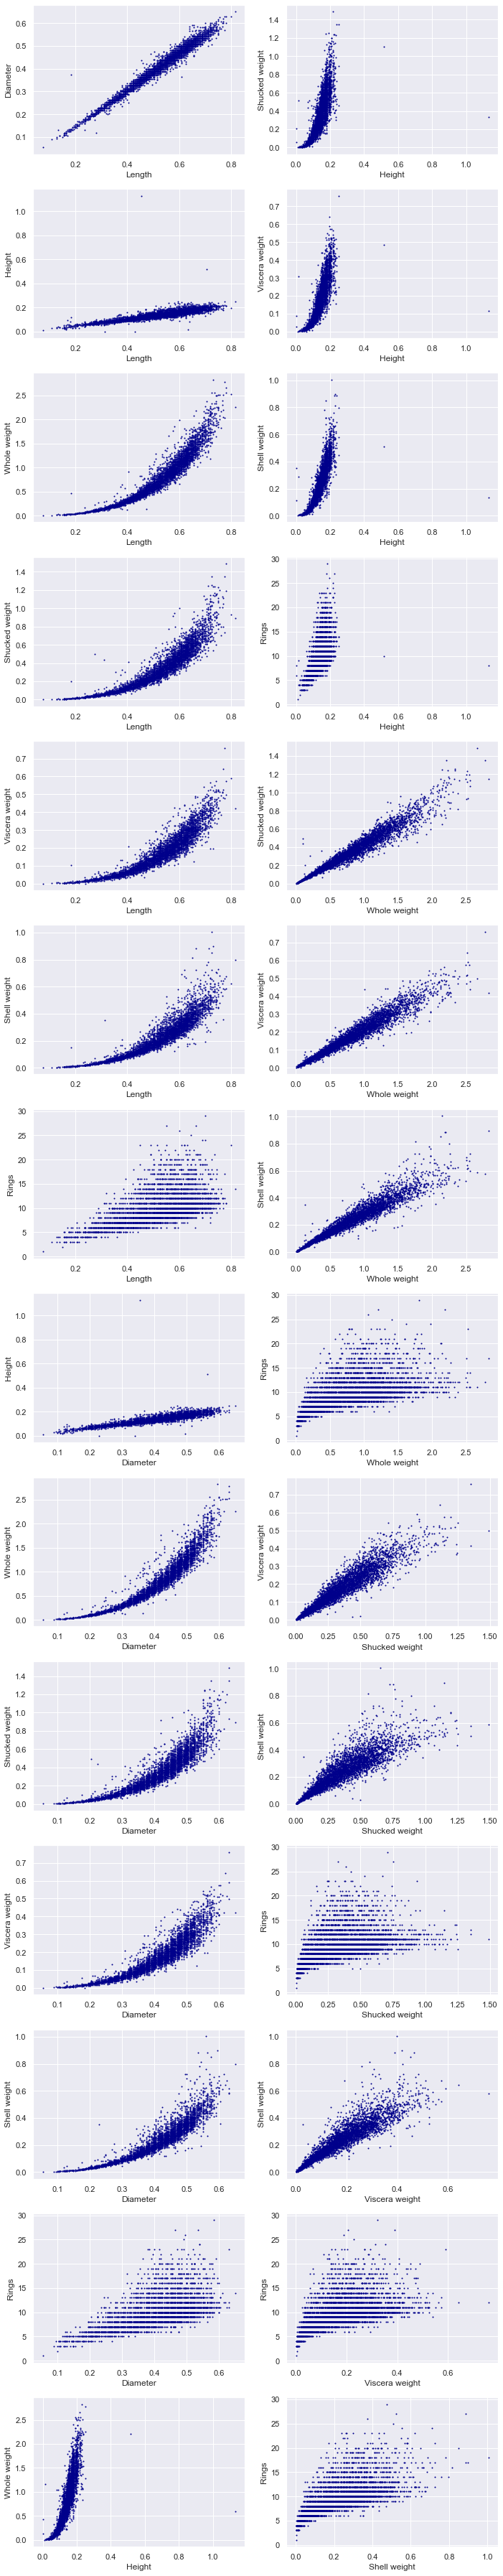

In [9]:
fig, axs = plt.subplots(nrows=14, ncols=2, figsize=(10,50), tight_layout=True)
pairs = list(combinations(quantitative.columns, 2))
for idx, pair in enumerate(pairs):
    axs[idx%14, idx//14].scatter(x=quantitative[pair[0]],
                                 y=quantitative[pair[1]], 
                                 c='DarkBlue', s=1)
    axs[idx%14, idx//14].set(xlabel=pair[0], ylabel=pair[1])

plt.show()

### 6. Matrix of linear correlation

In [10]:
corr = quantitative.corr()

corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


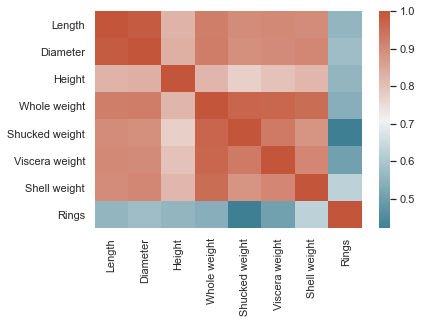

In [11]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

plt.show()

### 7. Linear regression chart of two most correlated features

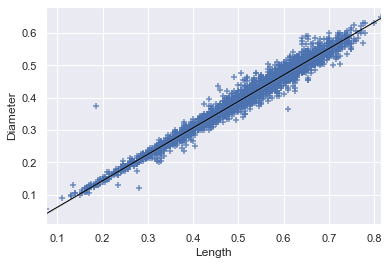

In [12]:
corr_abs = corr.abs()
corr_unst = corr_abs.unstack()
corr_sorted = corr_unst.sort_values(kind="quicksort")

highest_corr = list(corr_sorted.index[-len(corr)-1]) 
pair = quantitative[highest_corr].copy()
ax = sns.regplot(x=highest_corr[0], y=highest_corr[1], data=pair, marker="+", line_kws={"color":"black", "linewidth":1})

plt.show()

### 8. Measure of the distribution for each quantitative feature grouped by sex feature

In [13]:
frames = []
for feature in quantitative.columns:
    frame = data[[feature, 'Sex']].groupby('Sex').describe().drop([(feature, 'count')], axis=1)
    frame.columns = frame.columns.droplevel()
    frame['Feature'] = feature
    frames.append(frame)
dist_by_sex = pd.concat(frames).reset_index().set_index(['Feature', 'Sex'])

dist_by_sex

mean       std     min       25%       50%  \
Feature        Sex                                                       
Length         Female   0.579093  0.086160  0.2750  0.525000   0.59000   
               Infant   0.427746  0.108858  0.0750  0.360000   0.43500   
               Male     0.561460  0.102695  0.1550  0.505000   0.58000   
Diameter       Female   0.454732  0.070954  0.1950  0.410000   0.46500   
               Infant   0.326494  0.088109  0.0550  0.270000   0.33500   
               Male     0.439335  0.084404  0.1100  0.395000   0.45500   
Height         Female   0.158011  0.039984  0.0150  0.140000   0.16000   
               Infant   0.107996  0.031995  0.0000  0.085000   0.11000   
               Male     0.151418  0.034786  0.0250  0.130000   0.15500   
Whole weight   Female   1.046532  0.430316  0.0800  0.730000   1.03850   
               Infant   0.431363  0.286275  0.0020  0.205500   0.38400   
               Male     0.991772  0.470577  0.0155  0.673250   0.97600   
Shucked weight Female   0.446188  0.198663  0.0310  0.295000   0.44050   
               Infant   0.191035  0.128405  0.0010  0.090000   0.16975   
               Male     0.433083  0.223009  0.0065  0.276750   0.42200   
Viscera weight Female   0.230689  0.097617  0.0210  0.159000   0.22400   
               Infant   0.092010  0.062536  0.0005  0.042500   0.08050   
               Male     0.215620  0.104912  0.0030  0.146000   0.21000   
Shell weight   Female   0.302010  0.125649  0.0250  0.213250   0.29500   
               Infant   0.128182  0.084927  0.0015  0.064125   0.11300   
               Male     0.282056  0.130833  0.0050  0.190000   0.27600   
Rings          Female  11.129304  3.104256  5.0000  9.000000  10.00000   
               Infant   7.890462  2.511554  1.0000  6.000000   8.00000   
               Male    10.702685  3.025343  3.0000  9.000000  10.00000   

                             75%      max  
Feature        Sex                         
Length         Female   0.640000   0.8150  
               Infant   0.510000   0.7250  
               Male     0.630000   0.7800  
Diameter       Female   0.505000   0.6500  
               Infant   0.390000   0.5500  
               Male     0.500000   0.6300  
Height         Female   0.175000   1.1300  
               Infant   0.130000   0.2200  
               Male     0.175000   0.5150  
Whole weight   Female   1.320250   2.6570  
               Infant   0.599375   2.0495  
               Male     1.265750   2.8255  
Shucked weight Female   0.573250   1.4880  
               Infant   0.270375   0.7735  
               Male     0.566000   1.3510  
Viscera weight Female   0.297250   0.5900  
               Infant   0.130000   0.4405  
               Male     0.278000   0.7600  
Shell weight   Female   0.375000   1.0050  
               Infant   0.178500   0.6550  
               Male     0.355500   0.8970  
Rings          Female  12.000000  29.0000  
               Infant   9.000000  21.0000  
               Male    12.000000  27.0000

### 9. Box plot for each quantitative feature grouped by sex feature

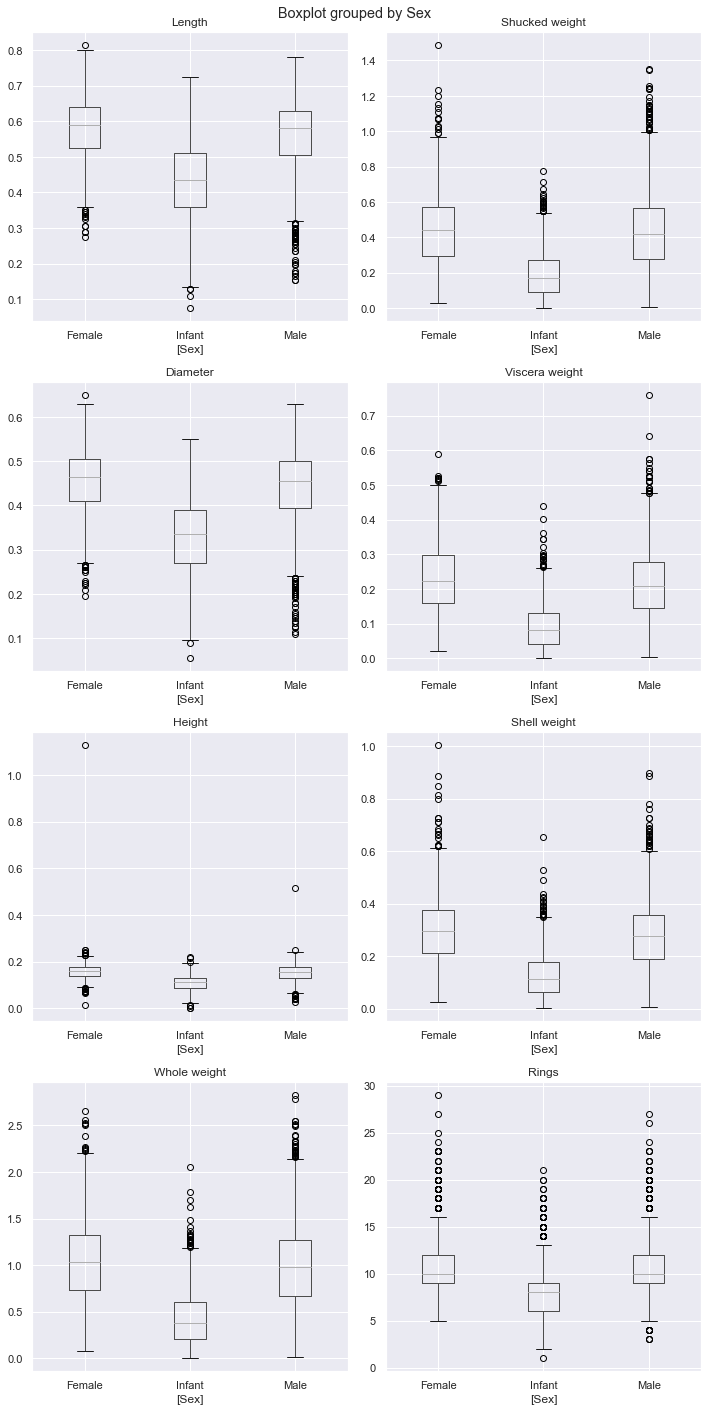

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,20), tight_layout=True)
for idx, feature in enumerate(data.loc[:, data.columns!='Sex'].columns):
    data[['Sex', feature]].boxplot(by='Sex', ax=axs[idx%4,idx//4])

plt.show()